In [13]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# - Part I

In [15]:
titres = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"] #titres 2010
data = yf.download(titres, start="2023-01-01", end="2024-01-01", interval="1d") #période et fréquence des données
portfolio_returns = data['Adj Close'].pct_change().mean(axis=1) #portfolio return

[*********************100%%**********************]  10 of 10 completed


In [16]:
data.head()

Price       Adj Close                                                          \
Ticker          BN.PA     BNP.PA      CS.PA    ENGI.PA     GLE.PA       MC.PA   
Date                                                                            
2023-01-02  46.247299  48.110371  23.481457  11.241073  21.710365  676.864258   
2023-01-03  46.597092  49.056286  23.636610  11.201270  22.055971  685.348267   
2023-01-04  47.030834  51.070740  23.977949  10.984011  22.863884  719.674133   
2023-01-05  47.170750  51.333492  23.711971  11.070251  22.836954  710.312561   
2023-01-06  46.307930  51.771420  24.243927  10.735241  22.899790  730.205994   

Price                                                   ...   Volume           \
Ticker           OR.PA    ORA.PA     SAN.PA     TTE.PA  ...    BN.PA   BNP.PA   
Date                                                    ...                     
2023-01-02  322.794647  8.475524  84.858658  55.699268  ...   597864  1815541   
2023-01-03  324.039459  8.596423  85.460297  54.734138  ...  1012176  2816969   
2023-01-04  341.036224  8.854461  85.404762  53.453480  ...  1319109  4045737   
2023-01-05  339.025330  8.929345  83.627617  53.769001  ...  1050165  2872672   
2023-01-06  343.382233  8.923932  84.340332  54.455738  ...  1502257  2907109   

Price                                                                     \
Ticker        CS.PA  ENGI.PA   GLE.PA   MC.PA   OR.PA    ORA.PA   SAN.PA   
Date                                                                       
2023-01-02  2631455  3169475  2587683  194703  182912   4895584  1118828   
2023-01-03  3317412  7563566  3015378  316482  317275   8566945  1793153   
2023-01-04  5214012  8863663  5320056  570725  459088  12227786  1934459   
2023-01-05  3973618  5212006  3920390  327709  343397   7259700  1939509   
2023-01-06  3739597  9011964  2675197  318415  298828   6347578  1356767   

Price                
Ticker       TTE.PA  
Date                 
2023-01-02  3907873  
2023-01-03  5540506  
2023-01-04  7364586  
2023-01-05  5310799  
2023-01-06  4484094  

[5 rows x 60 columns]

In [17]:
# benchmark (CAC 40)

benchmark = yf.download("^FCHI", start="2023-01-01", end="2024-01-01", interval="1d")
benchmark_returns = benchmark['Adj Close'].pct_change() #benchmark return

[*********************100%%**********************]  1 of 1 completed


In [18]:
# Rendement cumulative pour obtenir les perfs cumulées

cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod() - 1

In [19]:
# Appliquons une pondération 

# Répartition égale de 10 % pour chaque titre
weights = np.array([0.10] * len(titres))

# performance annuelle (variation des prix sur l'année)
initial_prices = data['Adj Close'].iloc[0]
final_prices = data['Adj Close'].iloc[-1]
annual_performance = (final_prices - initial_prices) / initial_prices

# DataFrame
summary_df = pd.DataFrame({
    'Ticker': titres,
    'Poids (%)': weights * 100,
    'Performance Annuelle (%)': annual_performance * 100
})

#tableau récapitulatif
summary_df.reset_index(drop=True, inplace=True)
print(summary_df)

    Ticker  Poids (%)  Performance Annuelle (%)
0   TTE.PA       10.0                 22.401846
1    BN.PA       10.0                 21.887567
2   SAN.PA       10.0                 18.315422
3   BNP.PA       10.0                 29.159721
4  ENGI.PA       10.0                  7.014585
5   ORA.PA       10.0                  7.361982
6    MC.PA       10.0                 37.494322
7    CS.PA       10.0                 16.895555
8    OR.PA       10.0                  1.559654
9   GLE.PA       10.0                  6.650461


In [20]:
# Performance finale du portefeuille et du benchmark en pourcentage
portfolio_performance_percent = cumulative_portfolio_returns.iloc[-1] * 100
benchmark_performance_percent = cumulative_benchmark_returns.iloc[-1] * 100

print(f"Performance du Portefeuille sur la période : {portfolio_performance_percent:.2f}%")
print(f"Performance du Benchmark (CAC 40) sur la période : {benchmark_performance_percent:.2f}%")

Performance du Portefeuille sur la période : 18.43%
Performance du Benchmark (CAC 40) sur la période : 14.38%


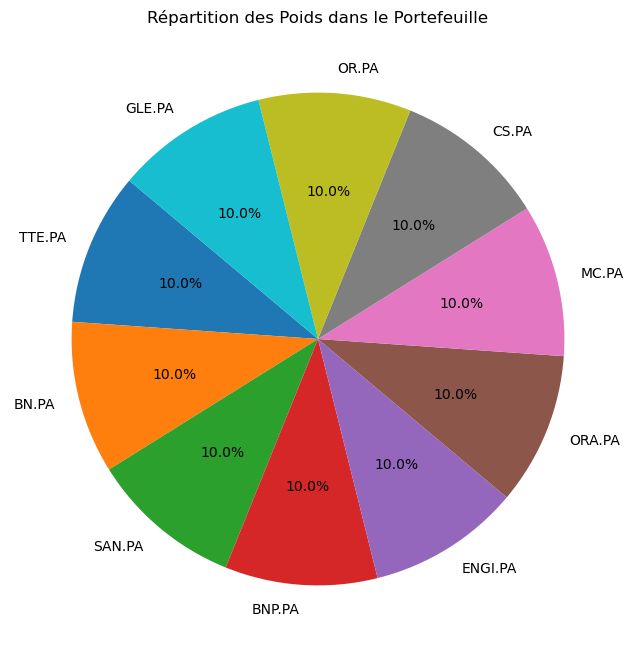

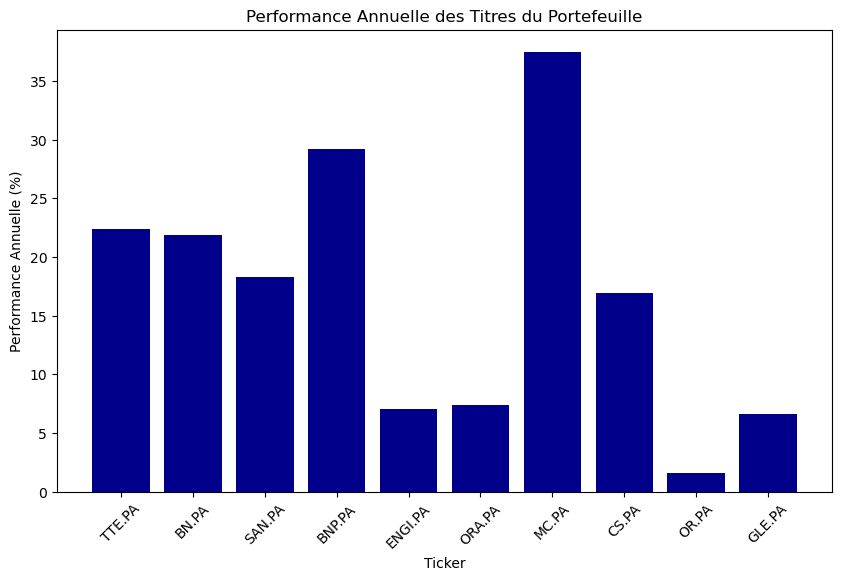

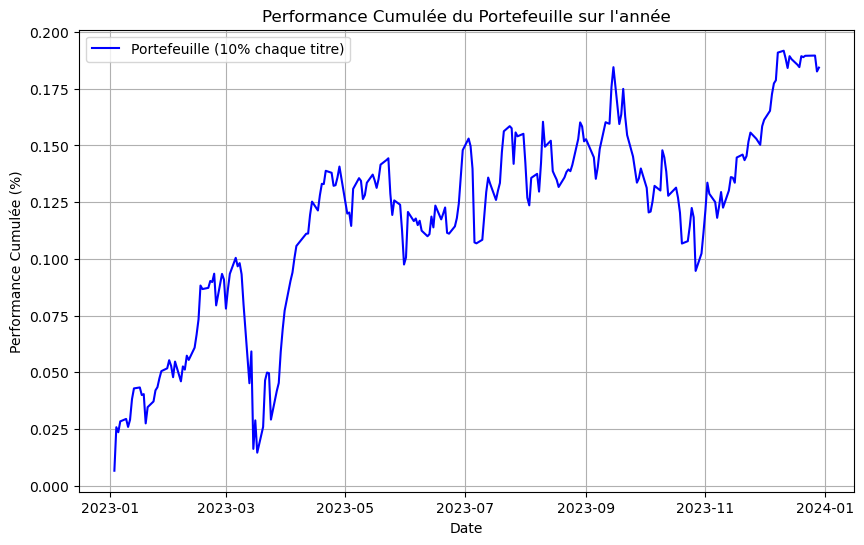

In [21]:
# 1. Diagramme circulaire pour la répartition des poids
plt.figure(figsize=(8, 8))
plt.pie(summary_df['Poids (%)'], labels=summary_df['Ticker'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Poids dans le Portefeuille')
plt.show()

# 2. Diagramme en barres pour la performance annuelle
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Ticker'], summary_df['Performance Annuelle (%)'], color='darkblue')
plt.title('Performance Annuelle des Titres du Portefeuille')
plt.xlabel('Ticker')
plt.ylabel('Performance Annuelle (%)')
plt.xticks(rotation=45)
plt.show()

# 3. Graphique de performance cumulée (si vous avez les rendements quotidiens)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portefeuille (10% chaque titre)', color='blue')
plt.title('Performance Cumulée du Portefeuille sur l\'année')
plt.xlabel('Date')
plt.ylabel('Performance Cumulée (%)')
plt.legend()
plt.grid(True)
plt.show()

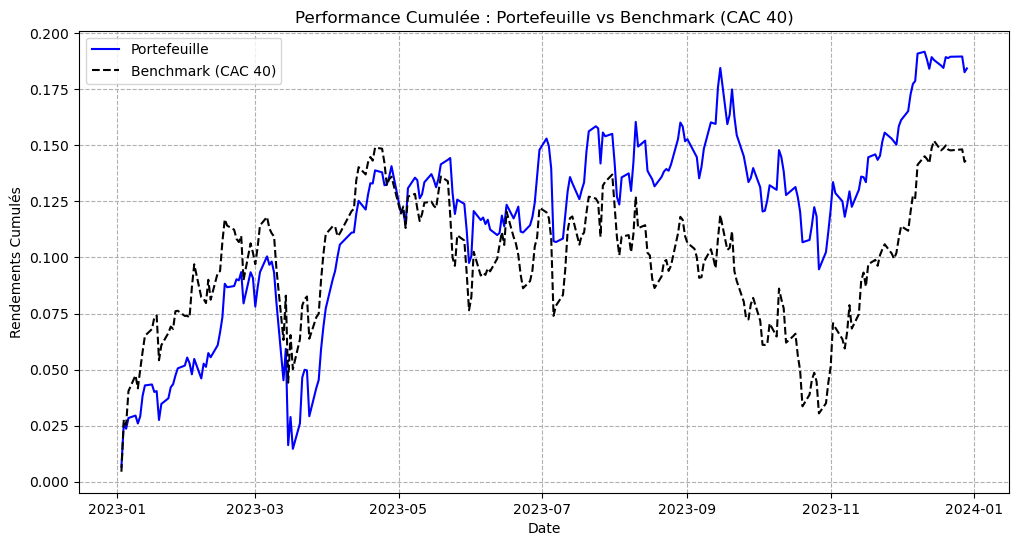

In [22]:
# Comparaison vs Benchmark

# Perf cumulées
plt.figure(figsize=(12, 6))
plt.plot(cumulative_portfolio_returns, label='Portefeuille', color='blue')
plt.plot(cumulative_benchmark_returns, label='Benchmark (CAC 40)', color='black', linestyle='--')
plt.title('Performance Cumulée : Portefeuille vs Benchmark (CAC 40)')
plt.xlabel('Date')
plt.ylabel('Rendements Cumulés')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

    Ticker  Contribution
0   TTE.PA      2.240185
1    BN.PA      2.188757
2   SAN.PA      1.831542
3   BNP.PA      2.915972
4  ENGI.PA      0.701459
5   ORA.PA      0.736198
6    MC.PA      3.749434
7    CS.PA      1.689556
8    OR.PA      0.155965
9   GLE.PA      0.665048

La somme des contributions est : 16.874114


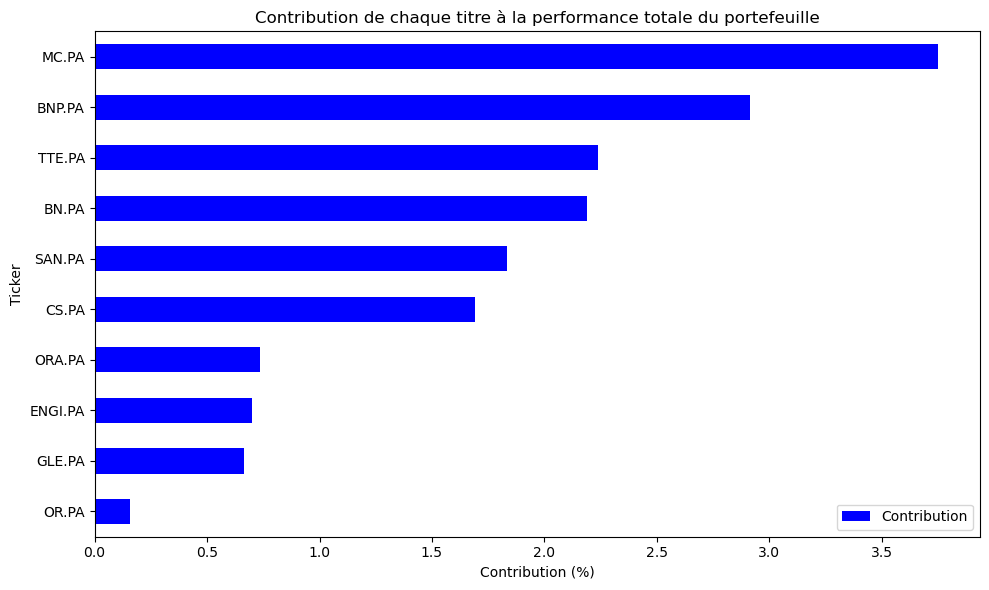

In [23]:
# Contribution de perf


# Ticker, Poids (%) et Performance Annuelle (%)
data = {
    'Ticker': ['TTE.PA', 'BN.PA', 'SAN.PA', 'BNP.PA', 'ENGI.PA', 'ORA.PA', 'MC.PA', 'CS.PA', 'OR.PA', 'GLE.PA'],
    'Poids (%)': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
    'Performance Annuelle (%)': [22.401846, 21.887567, 18.315422, 29.159721, 7.014585, 7.361982, 37.494335, 16.895555, 1.559654, 6.650475]
}

# Conversion en DataFrame
summary_df = pd.DataFrame(data)
summary_df['Contribution'] = (summary_df['Poids (%)'] / 100) * summary_df['Performance Annuelle (%)']
total_contribution = summary_df['Contribution'].sum()
print(summary_df[['Ticker', 'Contribution']])
print(f"\nLa somme des contributions est : {total_contribution:.6f}")

fig, ax = plt.subplots(figsize=(10, 6))
summary_df.sort_values('Contribution', ascending=True).plot(kind='barh', x='Ticker', y='Contribution', ax=ax, color='blue')
ax.set_title('Contribution de chaque titre à la performance totale du portefeuille')
ax.set_xlabel('Contribution (%)')
ax.set_ylabel('Ticker')
ax.grid(False)
plt.tight_layout()
plt.show()

# Composition de notre portefeuille

Notre portefeuille est composé des titres suivants :

| Ticker     | Entreprise       | Poids dans le portefeuille | Contribution (%) |
|------------|------------------|----------------------------|------------------|
| **TTE.PA** | TotalEnergies     | 10%                        | 2.2402          |
| **BN.PA**  | Danone           | 10%                        | 2.1888           |
| **SAN.PA** | Sanofi           | 10%                        | 1.8315           |
| **BNP.PA** | BNP Paribas      | 10%                        | 2.9160           |
| **ENGI.PA**| Engie            | 10%                        | 0.7015           |
| **ORA.PA** | Orange           | 10%                        | 0.7362           |
| **MC.PA**  | LVMH             | 10%                        | 3.7494           |
| **CS.PA**  | AXA              | 10%                        | 1.6896           |
| **OR.PA**  | L'Oréal          | 10%                        | 0.1560           |
| **GLE.PA** | Société Générale | 10%                        | 0.6650           |


**Poids total** : 100% investi en actions

**Période de placement** : 2023 - 2024 (Janv. vs Janv)

**Performance du portefeuille** : + 18.43 %

**Performance du benchmark** : + 14.38 %

# - Part II : Analyse Quantitative de la Performance Historique


In [26]:
# Corrected approach to backtest the portfolio with weights considered

# Step 1: Define the tickers and weights for your portfolio
tickers = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"]
weights = [0.10] * len(tickers)  # Assuming equal weighting, adjust if weights differ

# Risk-free rate for Sharpe Ratio (assume 0% for simplicity)
risk_free_rate = 0.01

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


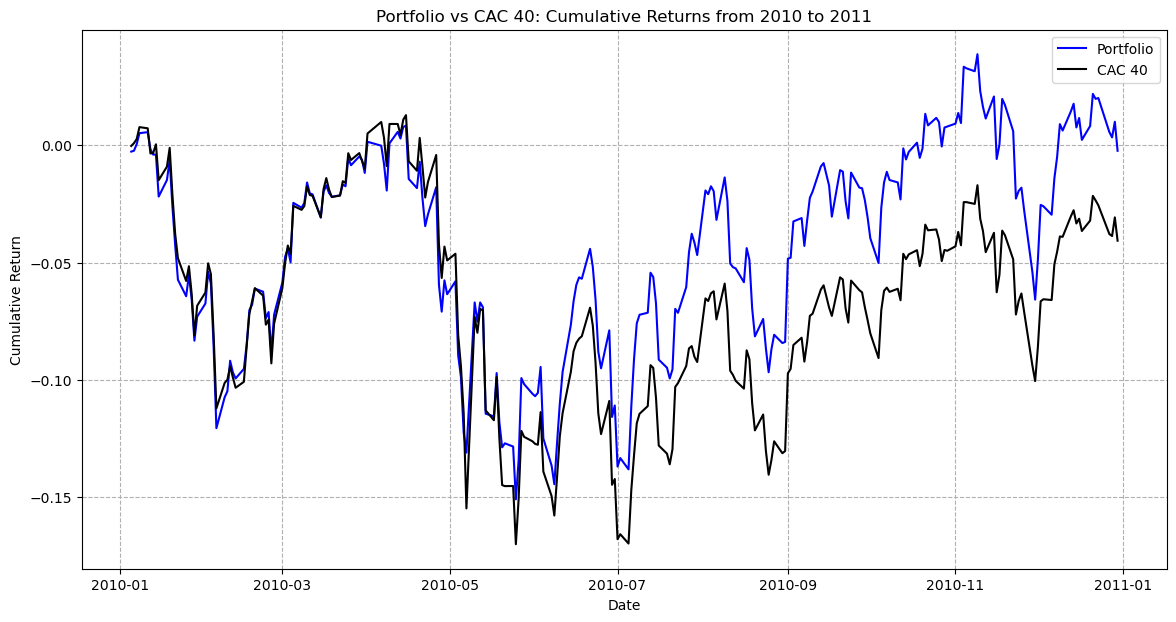

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2010 à 2011 : -0.23%
Performance du Benchmark (CAC 40) de 2010 à 2011 : -4.07%

Sharpe Ratio du Portefeuille de 2010 à 2011 : -0.68
Sharpe Ratio du Benchmark (CAC 40) de 2010 à 2011 : -0.68



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


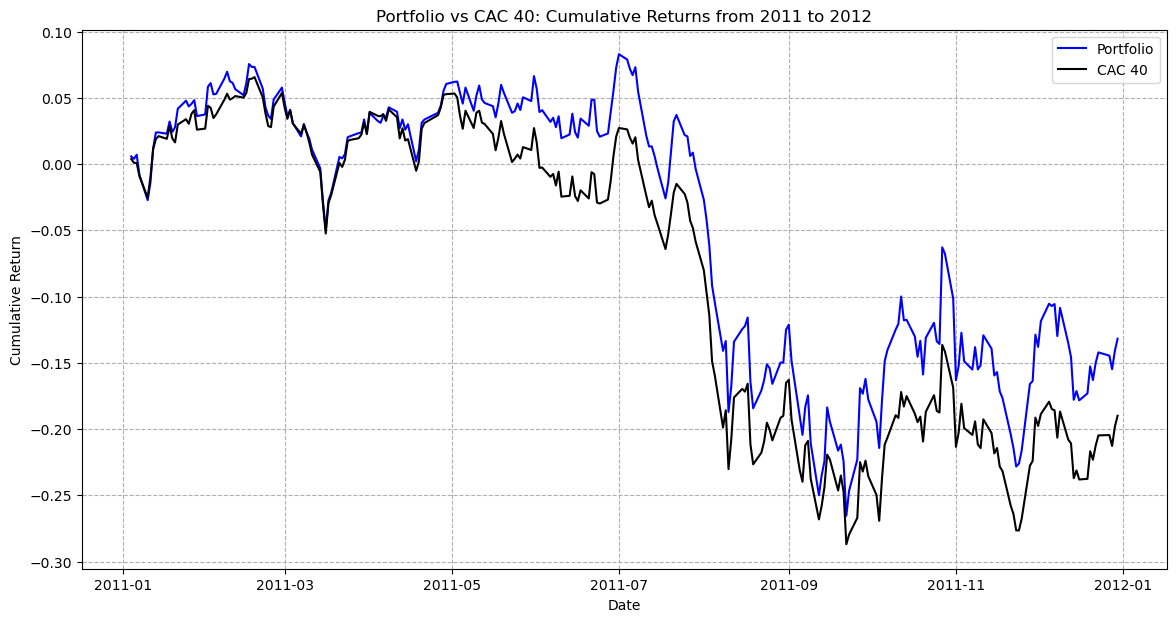

[**********            20%%                      ]  2 of 10 completed

Performance du Portefeuille de 2011 à 2012 : -13.18%
Performance du Benchmark (CAC 40) de 2011 à 2012 : -19.00%

Sharpe Ratio du Portefeuille de 2011 à 2012 : -0.53
Sharpe Ratio du Benchmark (CAC 40) de 2011 à 2012 : -0.59



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


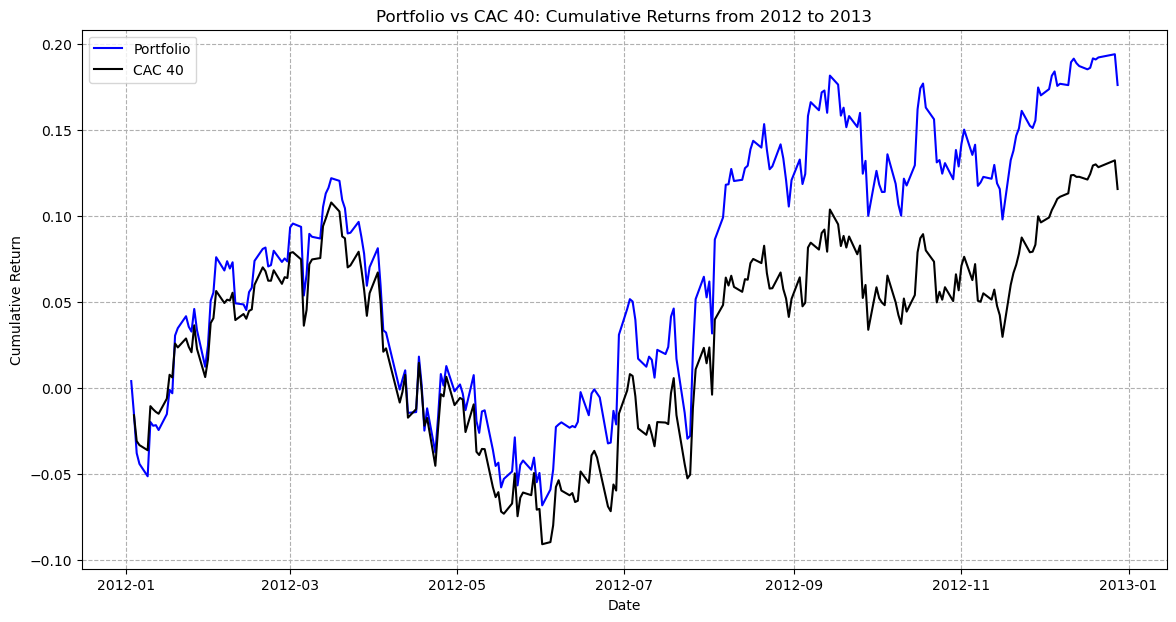

[*********************100%%**********************]  10 of 10 completed

Performance du Portefeuille de 2012 à 2013 : 17.59%
Performance du Benchmark (CAC 40) de 2012 à 2013 : 11.55%

Sharpe Ratio du Portefeuille de 2012 à 2013 : -0.65
Sharpe Ratio du Benchmark (CAC 40) de 2012 à 2013 : -0.73




[*********************100%%**********************]  1 of 1 completed


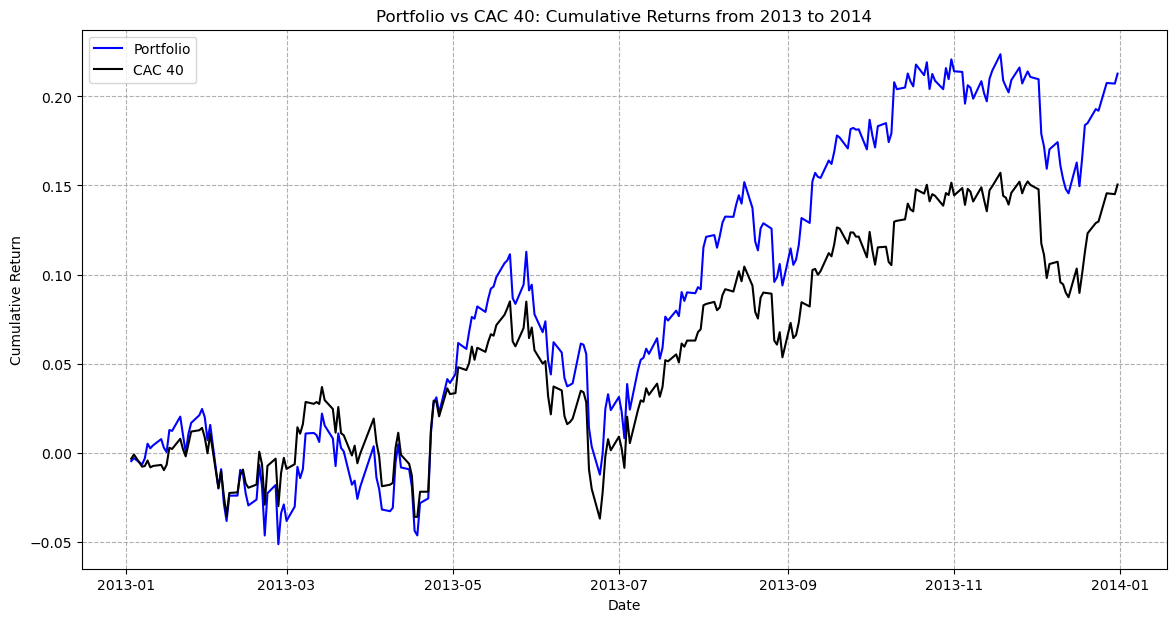

[**************        30%%                      ]  3 of 10 completed

Performance du Portefeuille de 2013 à 2014 : 21.28%
Performance du Benchmark (CAC 40) de 2013 à 2014 : 15.05%

Sharpe Ratio du Portefeuille de 2013 à 2014 : -0.81
Sharpe Ratio du Benchmark (CAC 40) de 2013 à 2014 : -0.94



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


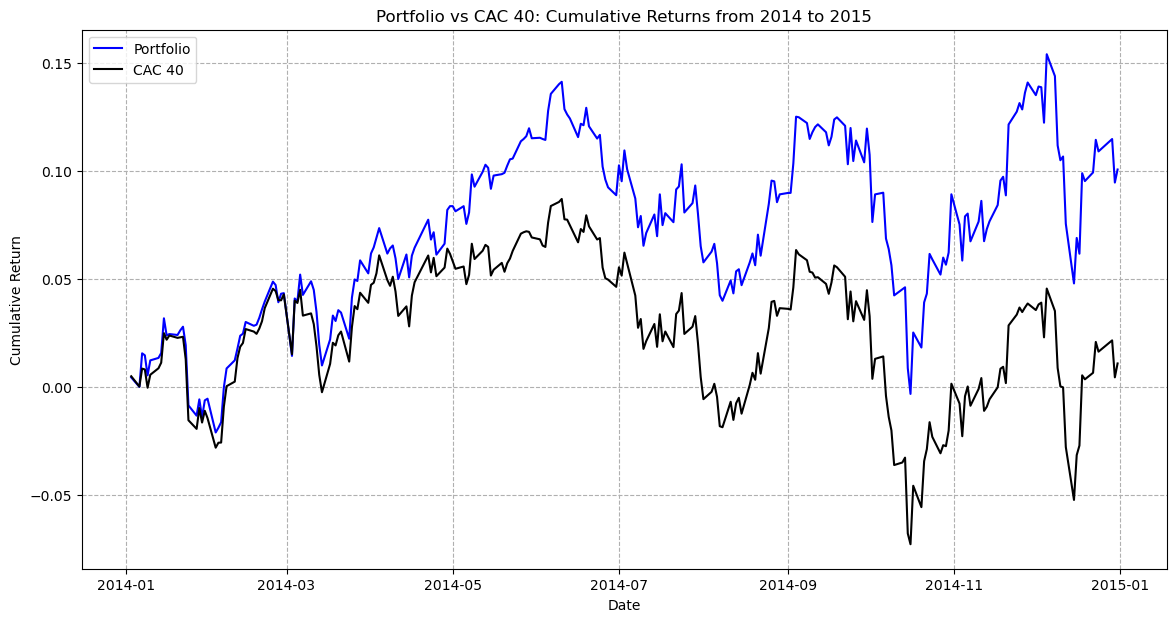

[**********            20%%                      ]  2 of 10 completed

Performance du Portefeuille de 2014 à 2015 : 10.06%
Performance du Benchmark (CAC 40) de 2014 à 2015 : 1.08%

Sharpe Ratio du Portefeuille de 2014 à 2015 : -0.90
Sharpe Ratio du Benchmark (CAC 40) de 2014 à 2015 : -0.98



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


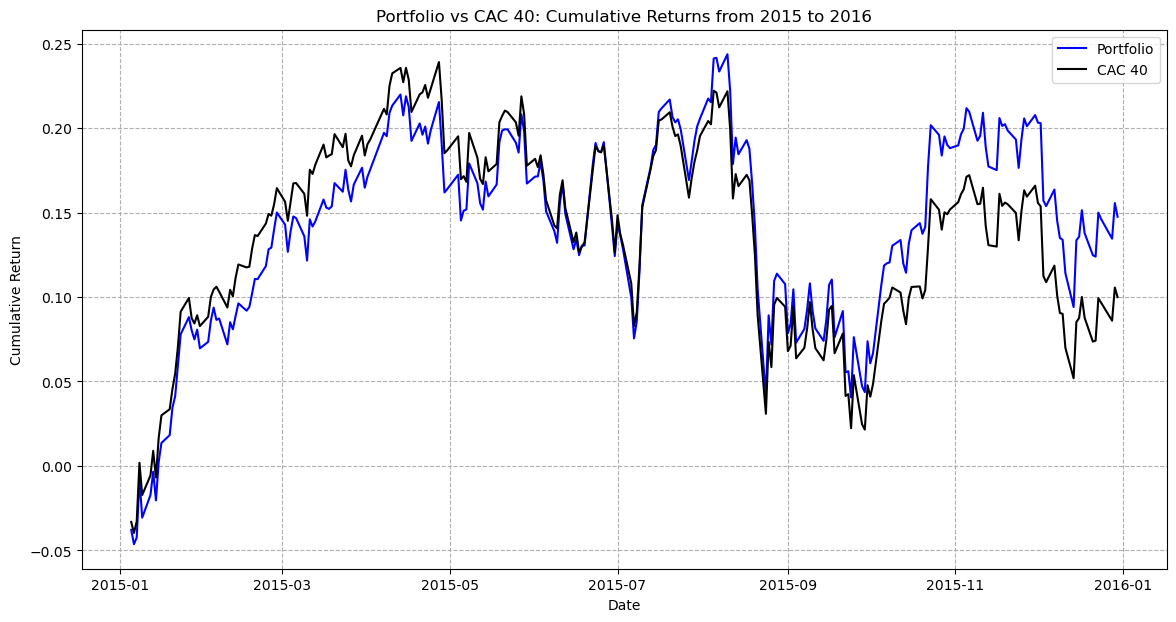

[**********            20%%                      ]  2 of 10 completed

Performance du Portefeuille de 2015 à 2016 : 14.75%
Performance du Benchmark (CAC 40) de 2015 à 2016 : 9.99%

Sharpe Ratio du Portefeuille de 2015 à 2016 : -0.62
Sharpe Ratio du Benchmark (CAC 40) de 2015 à 2016 : -0.67



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


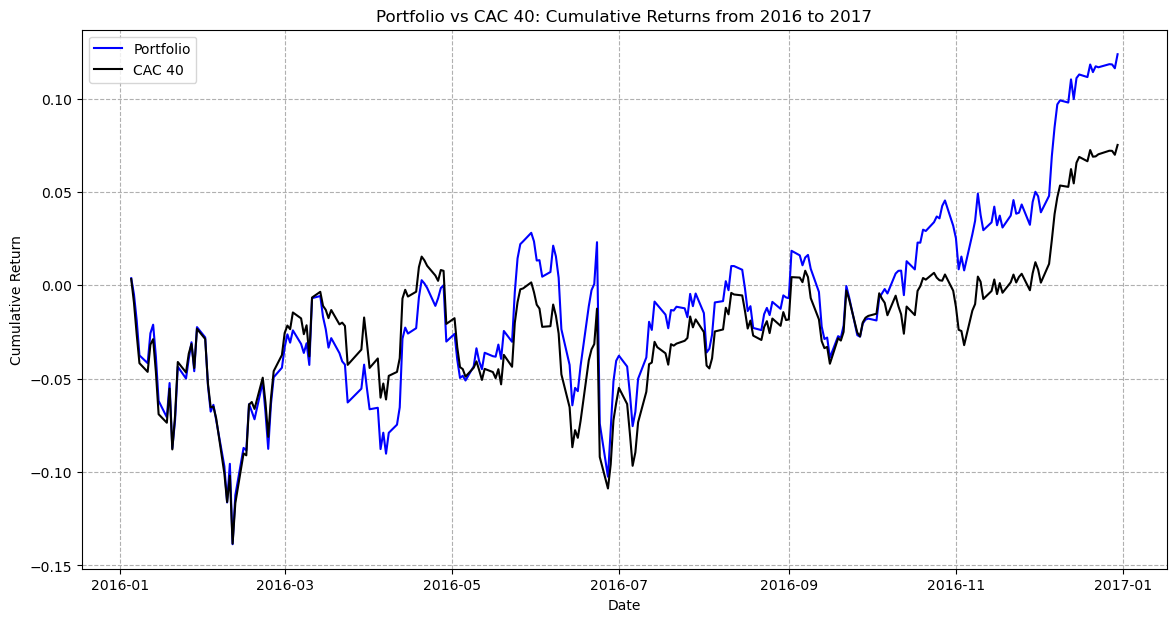

[**********            20%%                      ]  2 of 10 completed

Performance du Portefeuille de 2016 à 2017 : 12.37%
Performance du Benchmark (CAC 40) de 2016 à 2017 : 7.51%

Sharpe Ratio du Portefeuille de 2016 à 2017 : -0.66
Sharpe Ratio du Benchmark (CAC 40) de 2016 à 2017 : -0.74



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


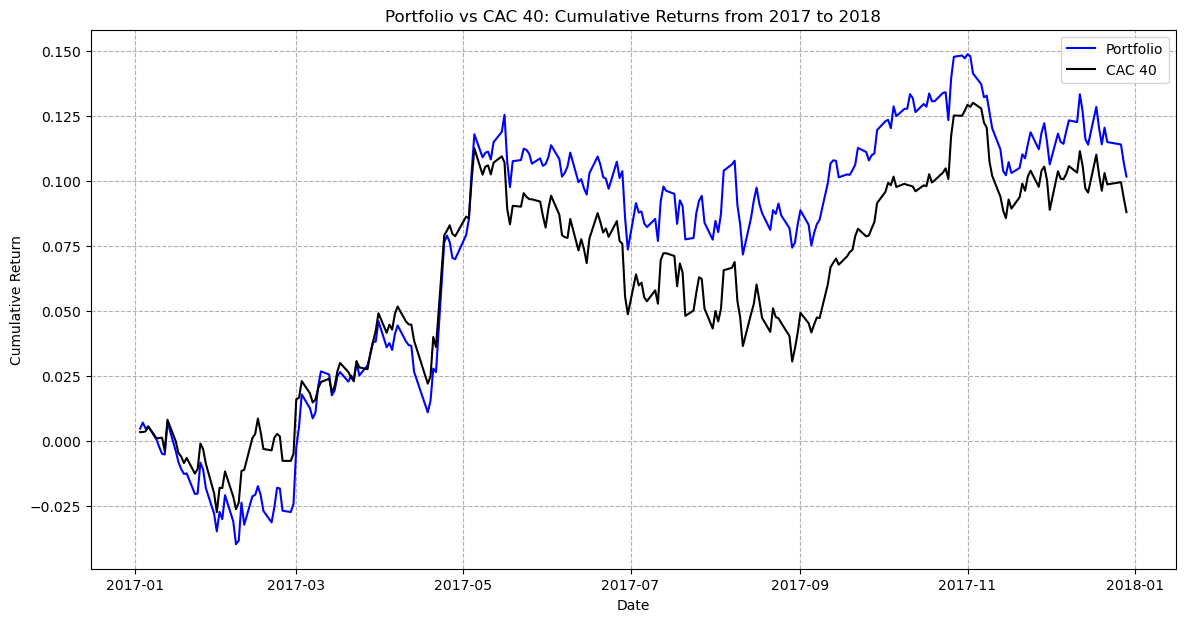

[**********            20%%                      ]  2 of 10 completed

Performance du Portefeuille de 2017 à 2018 : 10.18%
Performance du Benchmark (CAC 40) de 2017 à 2018 : 8.81%

Sharpe Ratio du Portefeuille de 2017 à 2018 : -1.35
Sharpe Ratio du Benchmark (CAC 40) de 2017 à 2018 : -1.45



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


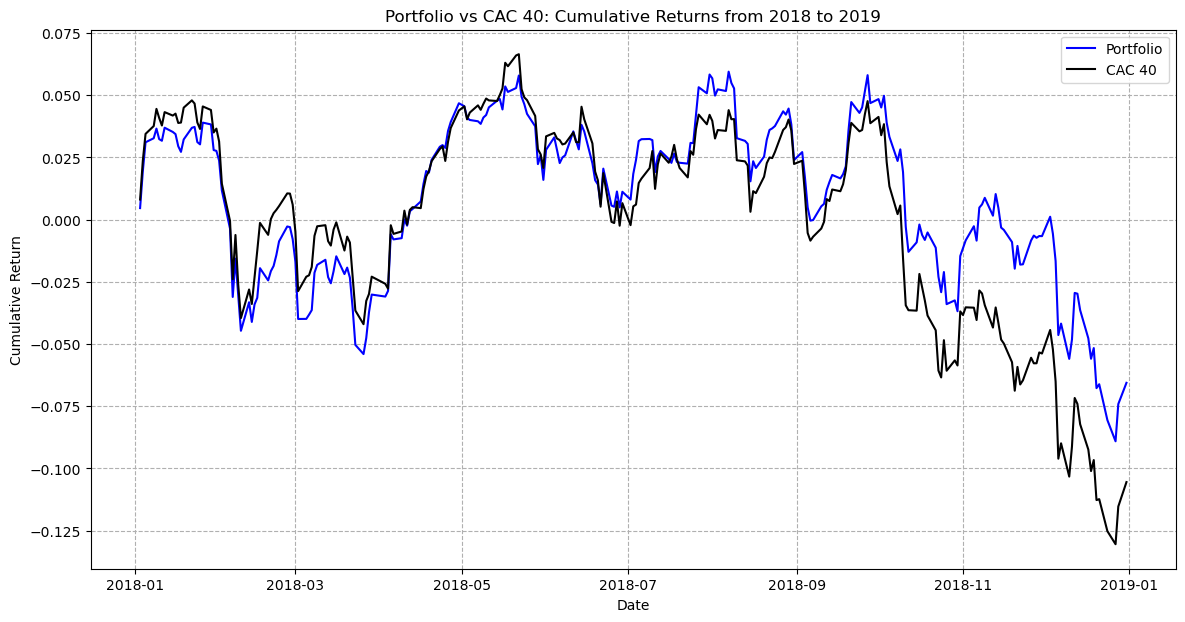

[**************        30%%                      ]  3 of 10 completed

Performance du Portefeuille de 2018 à 2019 : -6.56%
Performance du Benchmark (CAC 40) de 2018 à 2019 : -10.55%

Sharpe Ratio du Portefeuille de 2018 à 2019 : -1.27
Sharpe Ratio du Benchmark (CAC 40) de 2018 à 2019 : -1.20



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


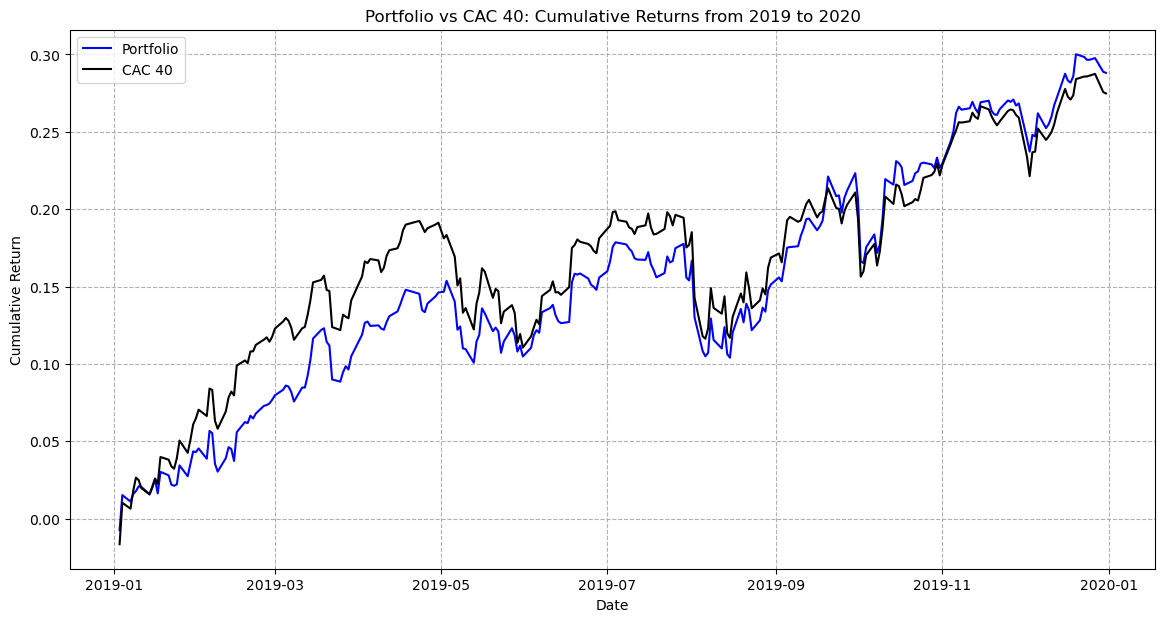

[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2019 à 2020 : 28.81%
Performance du Benchmark (CAC 40) de 2019 à 2020 : 27.48%

Sharpe Ratio du Portefeuille de 2019 à 2020 : -1.15
Sharpe Ratio du Benchmark (CAC 40) de 2019 à 2020 : -1.08



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


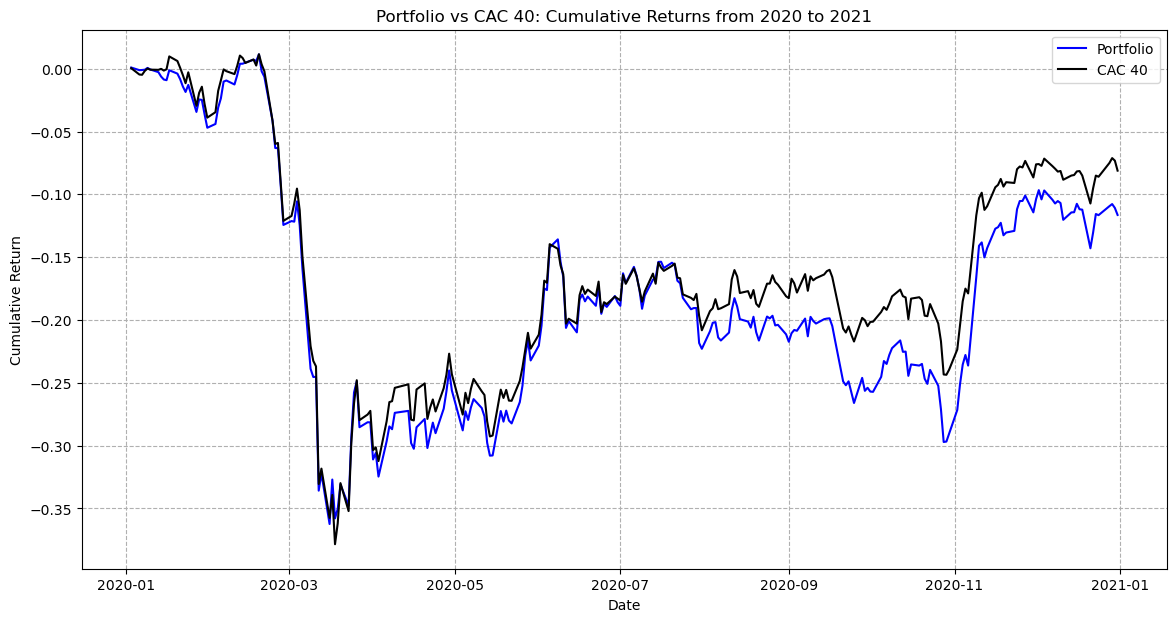

[**************        30%%                      ]  3 of 10 completed

Performance du Portefeuille de 2020 à 2021 : -11.64%
Performance du Benchmark (CAC 40) de 2020 à 2021 : -8.11%

Sharpe Ratio du Portefeuille de 2020 à 2021 : -0.48
Sharpe Ratio du Benchmark (CAC 40) de 2020 à 2021 : -0.50



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


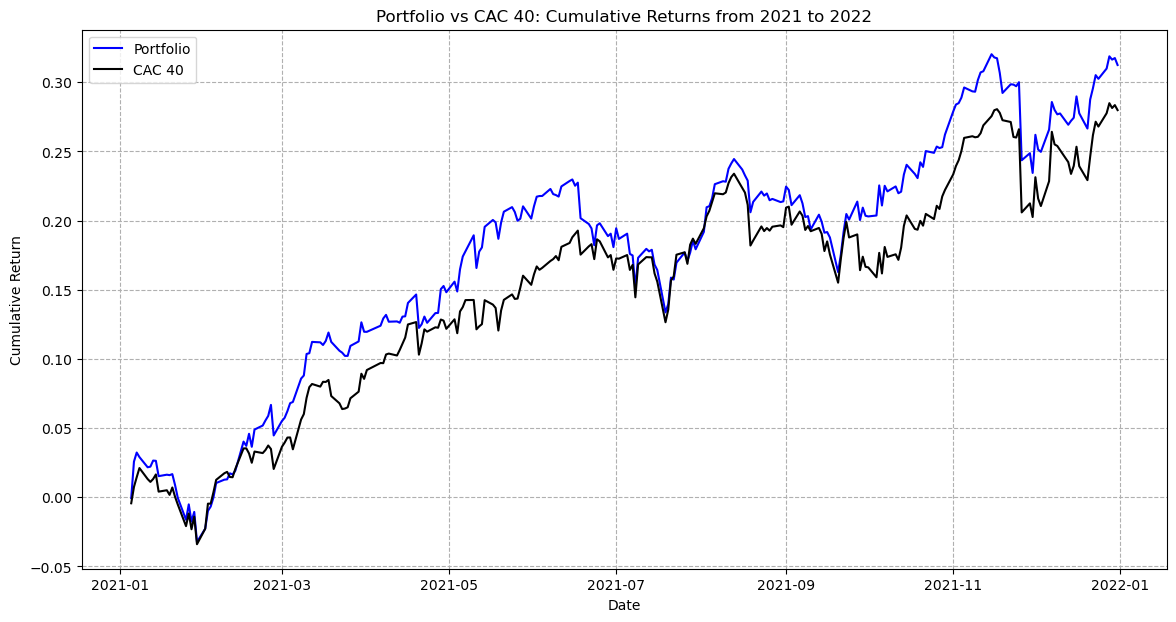

[**************        30%%                      ]  3 of 10 completed

Performance du Portefeuille de 2021 à 2022 : 31.25%
Performance du Benchmark (CAC 40) de 2021 à 2022 : 27.98%

Sharpe Ratio du Portefeuille de 2021 à 2022 : -1.04
Sharpe Ratio du Benchmark (CAC 40) de 2021 à 2022 : -1.02



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


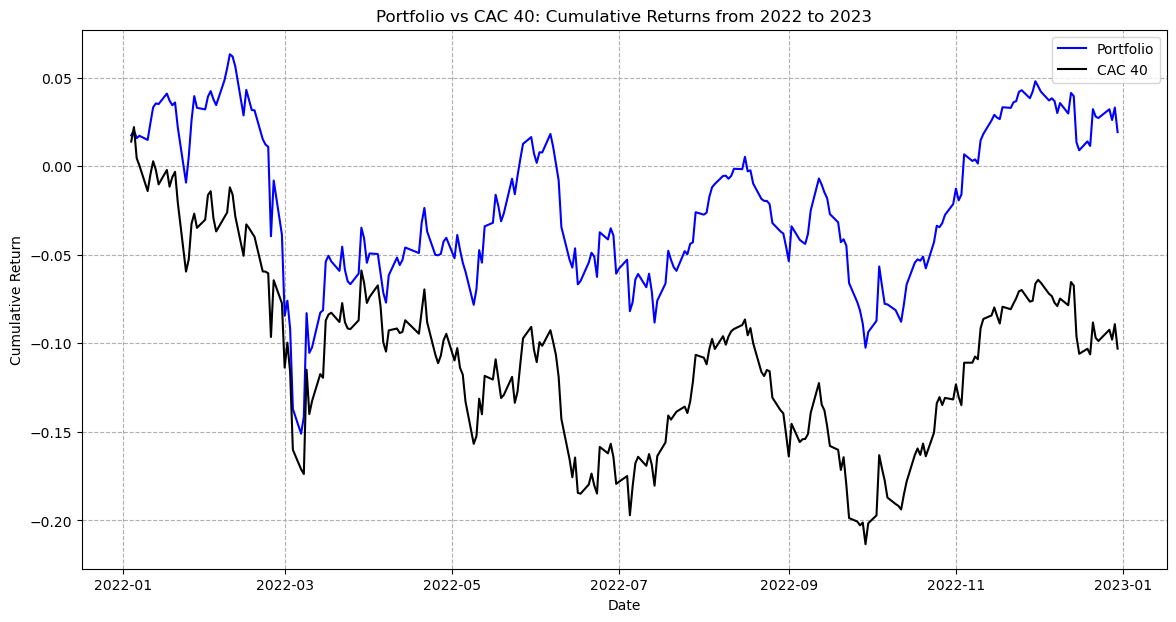

[*********************100%%**********************]  10 of 10 completed

Performance du Portefeuille de 2022 à 2023 : 1.92%
Performance du Benchmark (CAC 40) de 2022 à 2023 : -10.30%

Sharpe Ratio du Portefeuille de 2022 à 2023 : -0.76
Sharpe Ratio du Benchmark (CAC 40) de 2022 à 2023 : -0.73




[*********************100%%**********************]  1 of 1 completed


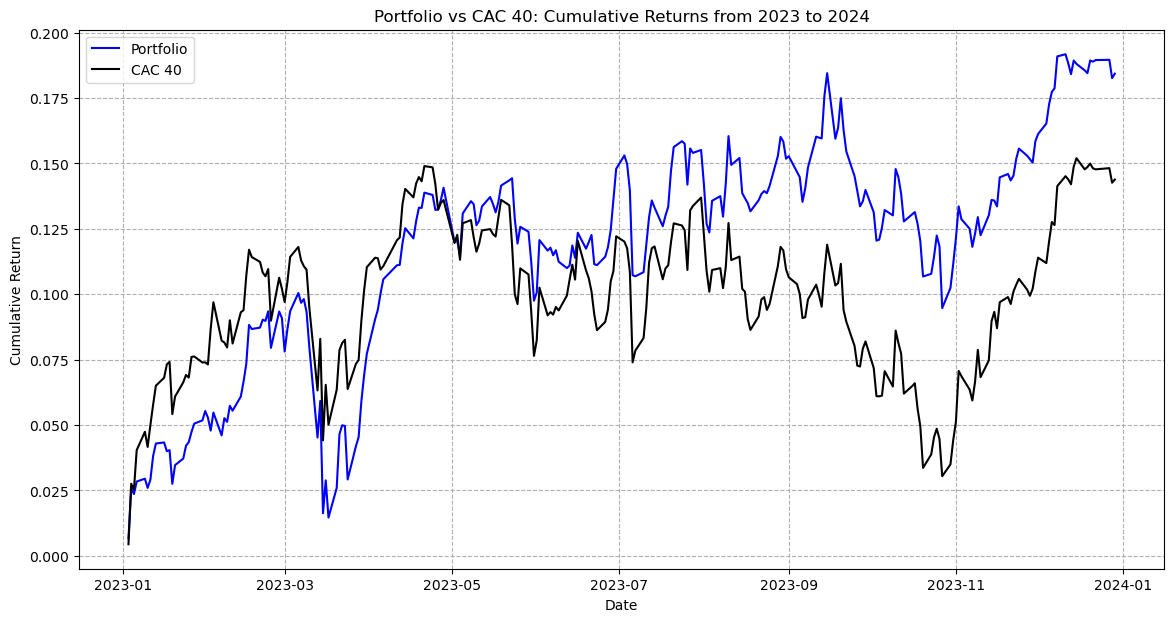

Performance du Portefeuille de 2023 à 2024 : 18.43%
Performance du Benchmark (CAC 40) de 2023 à 2024 : 14.38%

Sharpe Ratio du Portefeuille de 2023 à 2024 : -1.17
Sharpe Ratio du Benchmark (CAC 40) de 2023 à 2024 : -1.09



In [27]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
    
    # Step 1: Download historical data for the portfolio and CAC 40 index for the 1-year period
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    # Step 2: Calculate daily returns for each stock in the portfolio
    portfolio_returns = portfolio_data.pct_change()
    
    # Step 3: Calculate the weighted portfolio return by summing the weighted returns of individual stocks
    portfolio_weighted_return = portfolio_returns.dot(weights)
    
    # Step 4: Calculate the daily returns for the benchmark
    benchmark_returns = benchmark_data.pct_change()
    
    # Step 5: Calculate cumulative returns for both the portfolio and the benchmark
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    
    # Step 6: Plot the cumulative returns for comparison
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_cumulative_return, label="Portfolio", color="blue")
    plt.plot(benchmark_cumulative_return, label="CAC 40", color="black")
    plt.title(f"Portfolio vs CAC 40: Cumulative Returns from {start_year} to {end_year}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True, linestyle="--")
    plt.show()
    
    # Step 7: Calculate and print the final performance in percentage for the portfolio and benchmark
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (CAC 40) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

    # Step 8: Calculate Sharpe Ratio for the Portfolio
    excess_portfolio_returns = portfolio_weighted_return - risk_free_rate
    sharpe_ratio_portfolio = excess_portfolio_returns.mean() / excess_portfolio_returns.std()
    
    # Step 9: Calculate Sharpe Ratio for the Benchmark (CAC 40)
    excess_benchmark_returns = benchmark_returns - risk_free_rate
    sharpe_ratio_benchmark = excess_benchmark_returns.mean() / excess_benchmark_returns.std()
    
    # Print the Sharpe Ratios for comparison
    print(f"Sharpe Ratio du Portefeuille de {start_year} à {end_year} : {sharpe_ratio_portfolio:.2f}")
    print(f"Sharpe Ratio du Benchmark (CAC 40) de {start_year} à {end_year} : {sharpe_ratio_benchmark:.2f}\n")

In [28]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
 
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    portfolio_returns = portfolio_data.pct_change()
    portfolio_weighted_return = portfolio_returns.dot(weights)
    benchmark_returns = benchmark_data.pct_change()
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (CAC 40) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2010 à 2011 : -0.23%
Performance du Benchmark (CAC 40) de 2010 à 2011 : -4.07%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2011 à 2012 : -13.18%
Performance du Benchmark (CAC 40) de 2011 à 2012 : -19.00%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2012 à 2013 : 17.59%
Performance du Benchmark (CAC 40) de 2012 à 2013 : 11.55%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2013 à 2014 : 21.28%
Performance du Benchmark (CAC 40) de 2013 à 2014 : 15.05%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2014 à 2015 : 10.06%
Performance du Benchmark (CAC 40) de 2014 à 2015 : 1.08%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2015 à 2016 : 14.75%
Performance du Benchmark (CAC 40) de 2015 à 2016 : 9.99%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2016 à 2017 : 12.37%
Performance du Benchmark (CAC 40) de 2016 à 2017 : 7.51%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************90%%*****************     ]  9 of 10 completed

Performance du Portefeuille de 2017 à 2018 : 10.18%
Performance du Benchmark (CAC 40) de 2017 à 2018 : 8.81%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed


Performance du Portefeuille de 2018 à 2019 : -6.56%
Performance du Benchmark (CAC 40) de 2018 à 2019 : -10.55%



[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2019 à 2020 : 28.81%
Performance du Benchmark (CAC 40) de 2019 à 2020 : 27.48%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************50%%                      ]  5 of 10 completed

Performance du Portefeuille de 2020 à 2021 : -11.64%
Performance du Benchmark (CAC 40) de 2020 à 2021 : -8.11%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed

Performance du Portefeuille de 2021 à 2022 : 31.25%
Performance du Benchmark (CAC 40) de 2021 à 2022 : 27.98%




[**********************50%%                      ]  5 of 10 completed

Performance du Portefeuille de 2022 à 2023 : 1.92%
Performance du Benchmark (CAC 40) de 2022 à 2023 : -10.30%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Performance du Portefeuille de 2023 à 2024 : 18.43%
Performance du Benchmark (CAC 40) de 2023 à 2024 : 14.38%



In [29]:
# Performance moyenne
portfolio_performance = [
    -0.23, -13.18, 17.59, 21.28, 10.06, 14.75, 12.37, 10.18, -6.56, 28.81, -11.64, 31.25, 1.92, 18.43
]

# Calculate average portfolio performance
average_portfolio_performance = sum(portfolio_performance) / len(portfolio_performance)

average_portfolio_performance

9.645

In [30]:
# Initial investment and monthly contribution 

initial_investment = 10000  # euros
monthly_contribution = 500  # euros
years = len(portfolio_performance)  # 14 years of performance : from 2010 to 2024
months = years * 12

# Convert portfolio performance into monthly return and calculate the average monthly return
monthly_performance = [(1 + (p / 100))**(1/12) - 1 for p in portfolio_performance]
portfolio_value = initial_investment


for i in range(len(monthly_performance)):
    annual_return = monthly_performance[i]
    for month in range(12):
        # Monthly portfolio increase with contribution and growth
        portfolio_value = (portfolio_value + monthly_contribution) * (1 + annual_return)

portfolio_value

213838.7603495271

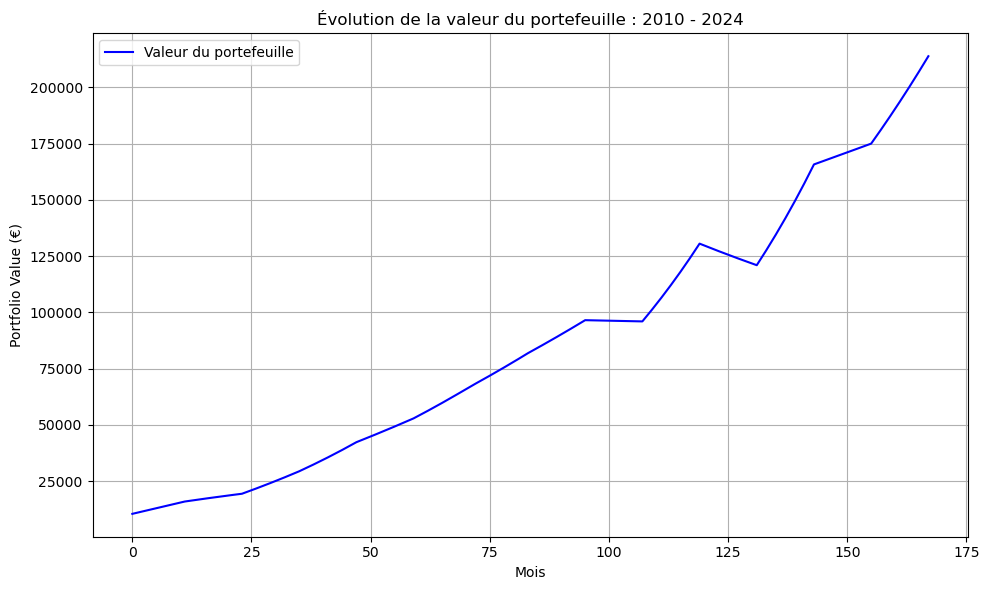

In [31]:
#PLOTING

portfolio_value = initial_investment
portfolio_values = []  
time_periods = [] 

# Loop through each year and month, calculating portfolio value
for i in range(len(monthly_performance)):
    annual_return = monthly_performance[i]
    for month in range(12):
        portfolio_value = (portfolio_value + monthly_contribution) * (1 + annual_return)
        portfolio_values.append(portfolio_value)
        time_periods.append(i * 12 + month)

plt.figure(figsize=(10, 6))
plt.plot(time_periods, portfolio_values, label='Valeur du portefeuille', color='blue')
plt.title("Évolution de la valeur du portefeuille : 2010 - 2024")
plt.xlabel("Mois")
plt.ylabel("Portfolio Value (€)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()